## Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Чтение файлов

In [112]:
# Чтение файлов и объединение данных
df = pd.concat([
    pd.read_csv('student_before_score.csv', index_col='student_id'),
    pd.read_csv('student_after_score.csv', index_col='student_id'),
    pd.read_csv('student_group.csv', index_col='student_id')
], axis=1, join="inner")

# Разделение данных по группам
course_gr = df[df['group'] == 'course']
no_course_gr = df[df['group'] == 'no_course']

In [113]:
def statis(df):
    stats_before = round(df['before_score'].describe())
    stats_after = round(df['after_score'].describe())
    
    stat_df = pd.DataFrame({
        'Описательная статистика до курсов': stats_before,
        'Описательная статистика после курсов': stats_after
    })
    
    print(stat_df)
    
    def plot_histogram(data, title):
        plt.figure(figsize=(20, 8))
        plt.yticks(range(0, max(data.value_counts()) + 5, 1))
        data.value_counts().plot(kind='bar')
        plt.title(title)
        plt.xlabel('Баллы')
        plt.ylabel('Частота')
        plt.grid(axis='y')
        plt.show()
    
    plot_histogram(df['before_score'], 'Частотная диаграмма баллов первой группы до курса')
    plot_histogram(df['after_score'], 'Частотная диаграмма баллов первой группы после курса')


## Группа проходившая курс

       Описательная статистика до курсов  Описательная статистика после курсов
count                              488.0                                 488.0
mean                                63.0                                  84.0
std                                 15.0                                   9.0
min                                 40.0                                  70.0
25%                                 51.0                                  76.0
50%                                 64.0                                  84.0
75%                                 75.0                                  90.0
max                                 89.0                                  99.0


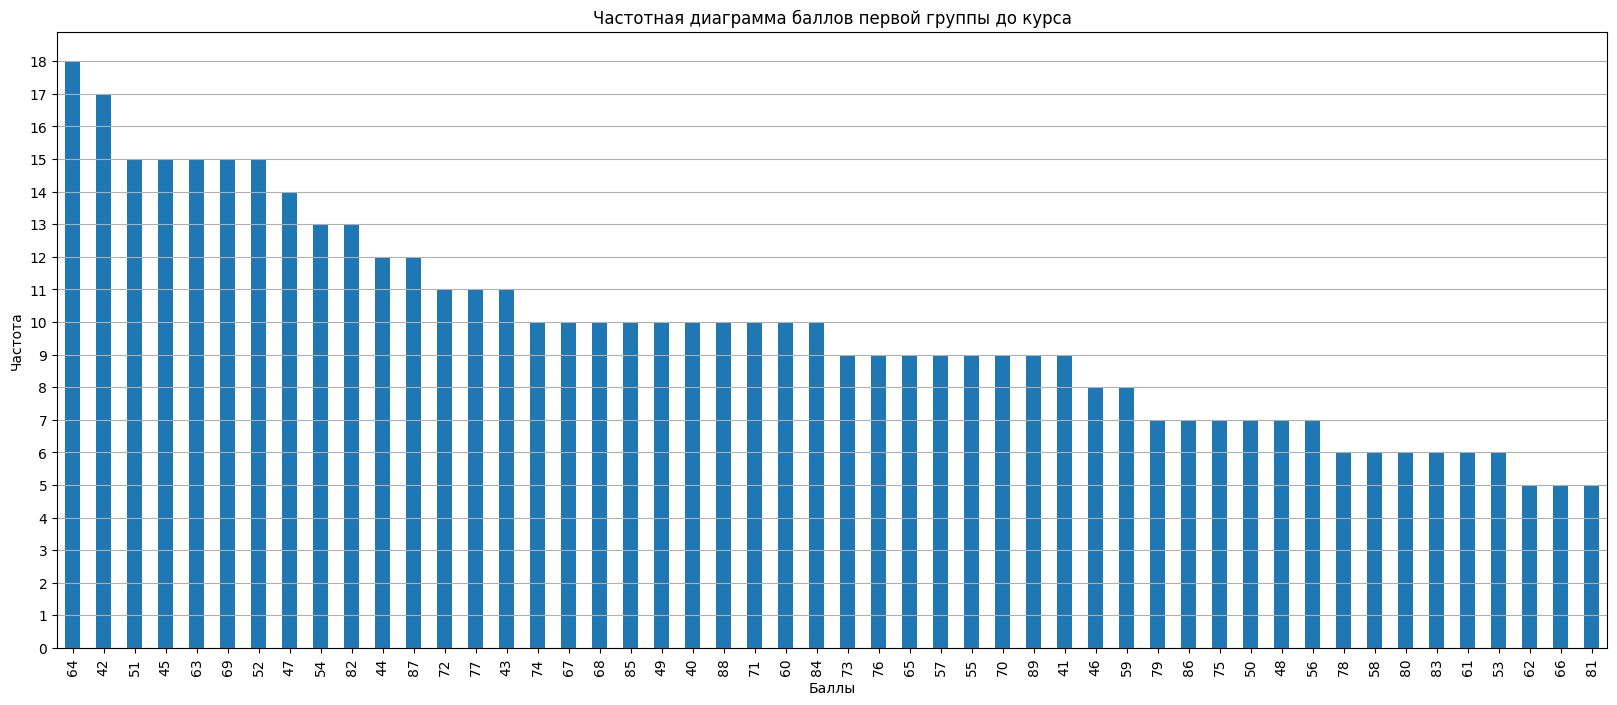

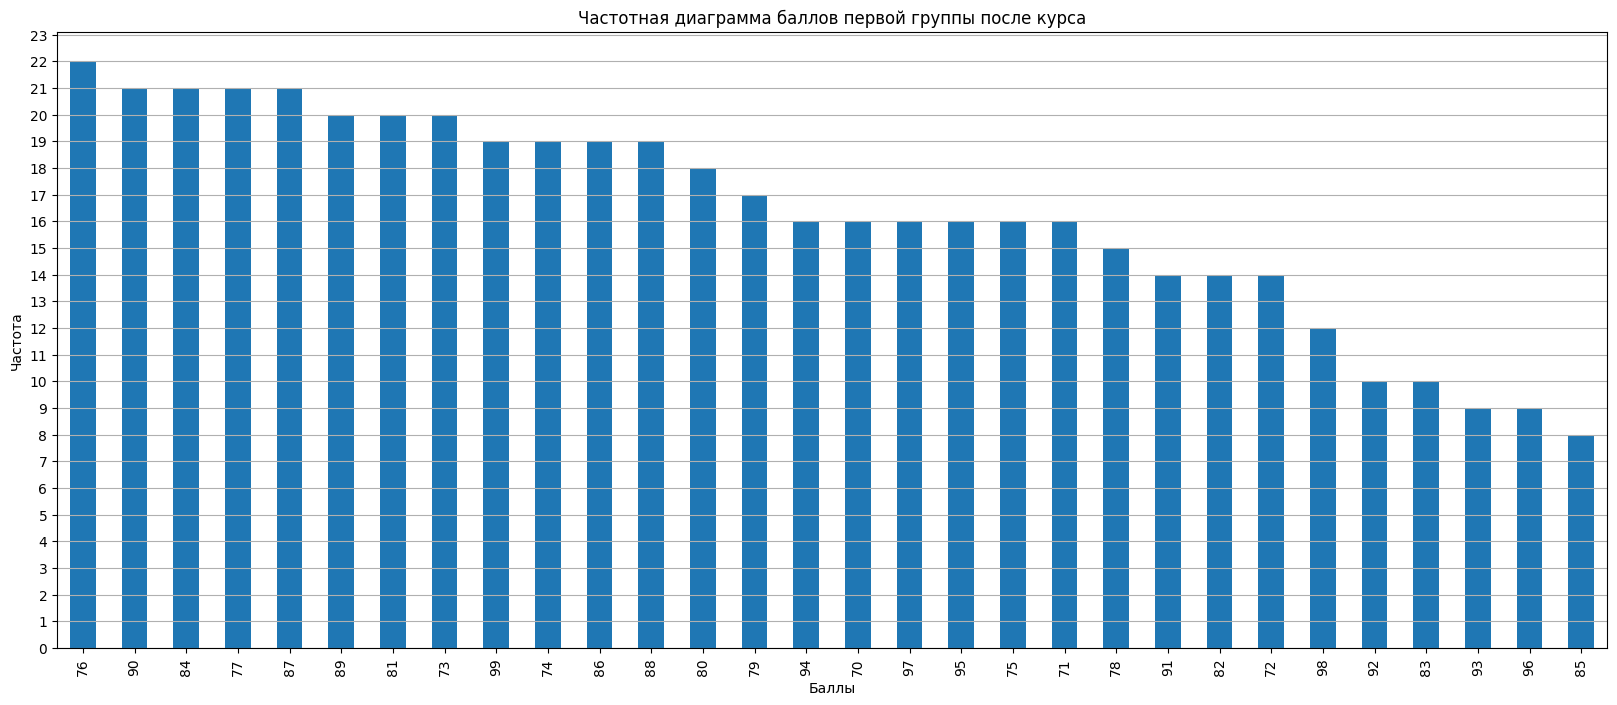

In [107]:
statis(course_gr)

## Группа не проходившая курс

       Описательная статистика до курсов  Описательная статистика после курсов
count                              512.0                                 512.0
mean                                65.0                                  85.0
std                                 15.0                                   9.0
min                                 40.0                                  70.0
25%                                 52.0                                  78.0
50%                                 64.0                                  86.0
75%                                 78.0                                  92.0
max                                 89.0                                  99.0


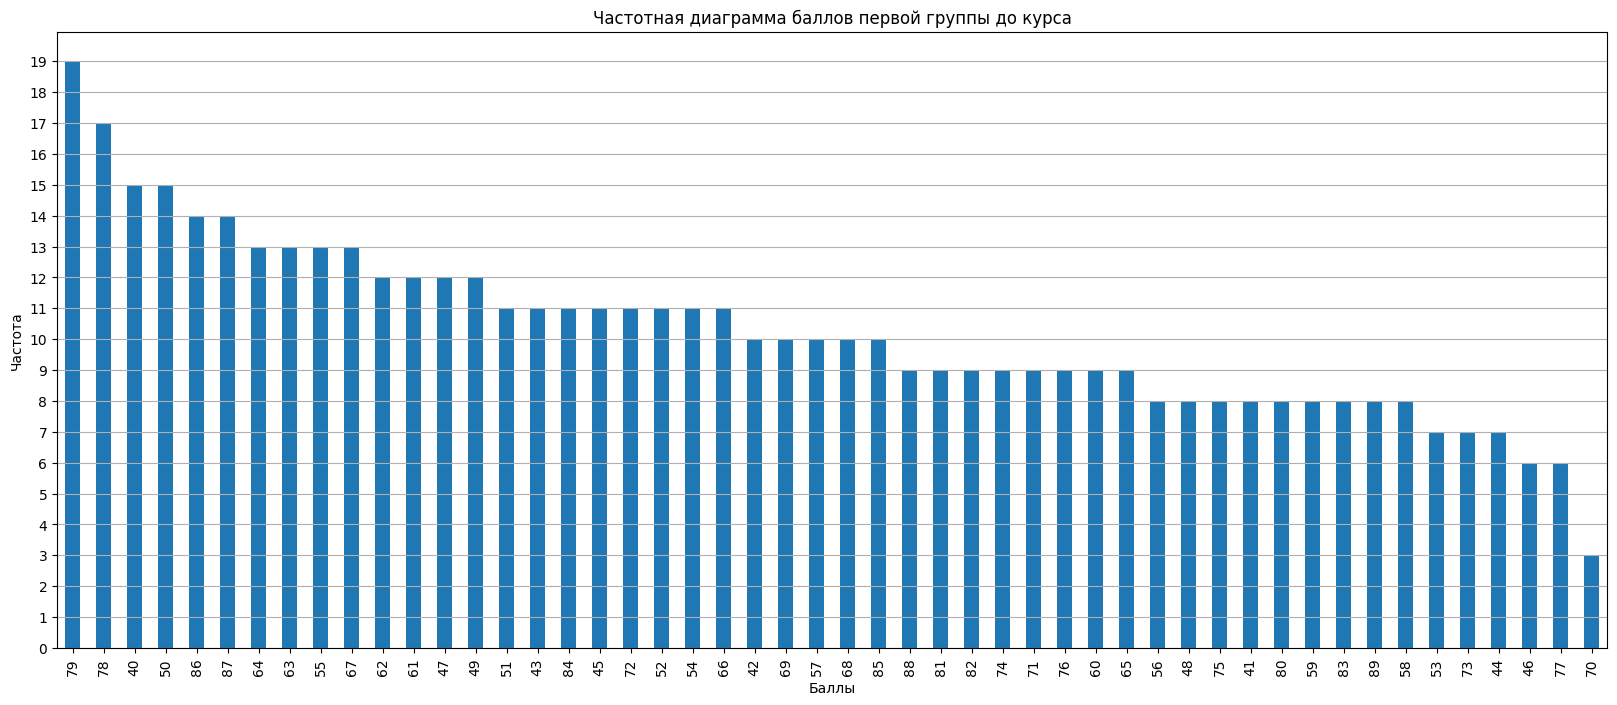

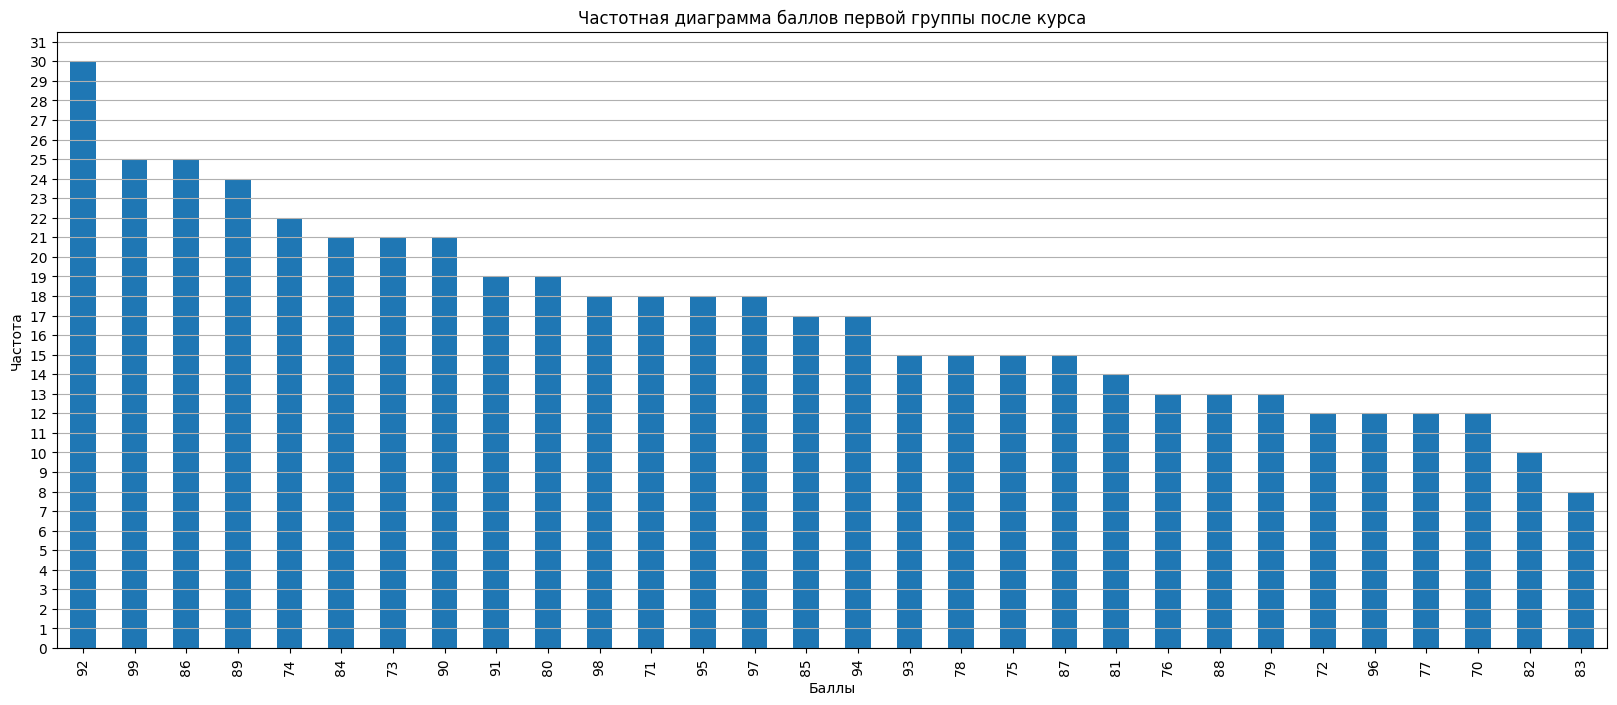

In [108]:
statis(no_course_gr)

## Диаграмма размаха

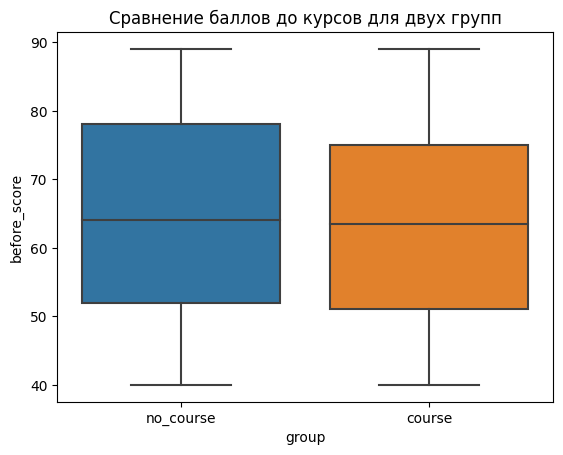

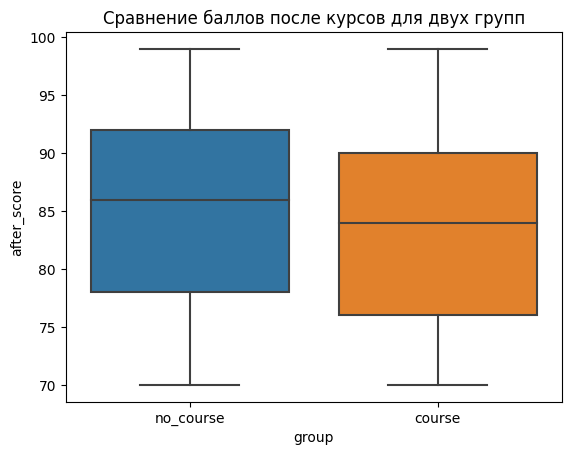

In [111]:
sns.boxplot(x='group', y='before_score', data=df)
plt.title('Сравнение баллов до курсов для двух групп')
plt.show()
sns.boxplot(x='group', y='after_score', data=df)
plt.title('Сравнение баллов после курсов для двух групп')
plt.show()